# TP analyse spatiale
Cours Humanités numériques spatialisées -
Ecole nationale des Chartes

Exploration des adresses (ponctuelles) de propriétaires de Paris en 1898 et 1951  

##Chargement des données

Téléchargez les données à partir de ce lien (https://github.com/cvbrandoe/coursHNS/blob/main/data/Adresses_prop_AnalyseSpatiale.zip), décompressez-les et ajoutez-les dans votre environnement Google Colaboratory.

N'oubliez pas d'adapter ci-dessous les chemins pour accéder aux fichiers.

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Charger les données
data_1898 = pd.read_csv('sample_data/1898_1_GeoHistorical_histogeoloc_prop.csv')
data_1951 = pd.read_csv('sample_data/df_1951_geoGT_geoH_total_ss_geoloc_vide.csv')

In [ ]:
len(data_1898)

14014

In [ ]:
len(data_1951)

99143

##Verifications

In [ ]:
import pandas as pd

def data_checks(df, year, lat_col, lon_col, column_for_unique_values=None):
    # Vérifier les lignes sans coordonnées
    missing_coords = df[df[lat_col].isnull() | df[lon_col].isnull()]
    num_missing_coords = missing_coords.shape[0]

    # Compter les valeurs vides dans chaque colonne
    missing_values = df.isnull().sum()

    # Afficher les résultats
    print(f"--- Vérifications pour l'année {year} ---")
    print(f"Nombre de lignes (total): {len(df)}")
    print(f"Nombre de lignes sans coordonnées : {num_missing_coords}")
    print("\nValeurs vides par colonne :")
    print(missing_values)

    # Afficher les valeurs uniques si une colonne est spécifiée
    if column_for_unique_values:
        unique_values = df[column_for_unique_values].unique()
        print(f"\nValeurs uniques pour la colonne '{column_for_unique_values}':")
        print(unique_values)

    print("\nAperçu des lignes sans coordonnées :")
    print(missing_coords.head())
    print("\n")

# Effectuer les vérifications pour chaque dataframe avec la possibilité d'afficher les valeurs uniques
data_checks(data_1898, 1898, lat_col='y_prop', lon_col='x_prop', column_for_unique_values='proprio_name*')
data_checks(data_1951, 1951, lat_col='lat_imm_geoH', lon_col='lng_imm_geoH', column_for_unique_values='nom_pers')


--- Vérifications pour l'année 1898 ---
Nombre de lignes (total): 14014
Nombre de lignes sans coordonnées : 987

Valeurs vides par colonne :
index*                    0
adresse                   0
num                       0
proprio[global]           0
collectif             12507
sexe                  11156
statut_femme          11411
proprio_titre*        13626
proprio_particule*    13471
proprio_name*             0
proprio_ad                3
proprio_numAd            85
commune_propio         1112
proprio_region*           0
Pays                      0
same_place*               0
commentaire           14001
x_prop                  987
y_prop                  987
source_prop             987
url_prop                987
dtype: int64

Valeurs uniques pour la colonne 'proprio_name*':
['La Guibourgère' 'Vallois' 'Michau et Douanne' ... 'Vangasse' 'Rousse'
 'Hureau de Villeneuve']

Aperçu des lignes sans coordonnées :
     index*               adresse num  proprio[global] collectif sexe  \


##Filtres et conversions

Pour avoir des jeux des données plus comparables en taille (attention au mode d'échantillonage)

In [ ]:
data_1951_sampled = data_1951.sample(frac=0.14, random_state=42)

In [ ]:
len(data_1951_sampled)

13880

Ignorer les lignes sans coordonnées pour la suite

In [ ]:
data_1898_cleaned = data_1898.dropna(subset=['y_prop', 'x_prop'])
len(data_1898_cleaned)

13027

Conversion en GeoDataFrame


<ipython-input-70-648e130a48b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geometry'] = df.apply(lambda row: Point(row[lon_col], row[lat_col]), axis=1)


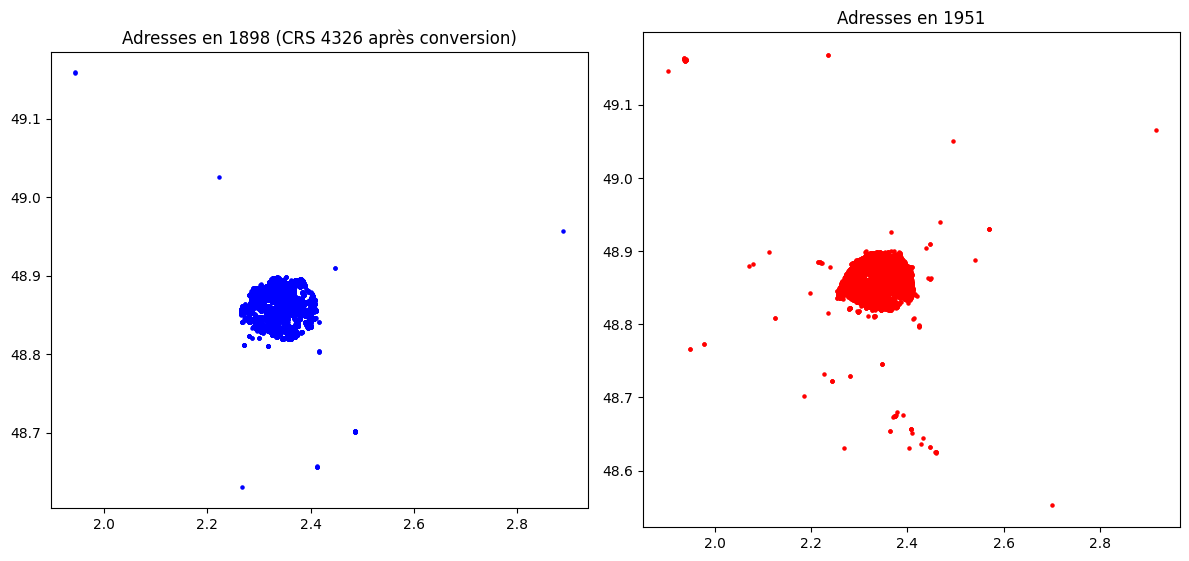

In [ ]:
# Conversion des adresses en GeoDataFrame
def convert_to_geodataframe(df, lon_col, lat_col, crs):
    df['geometry'] = df.apply(lambda row: Point(row[lon_col], row[lat_col]), axis=1)
    return gpd.GeoDataFrame(df, geometry='geometry', crs=crs)

# Convertir les deux datasets
# 1898 est en CRS 2154
gdf_1898 = convert_to_geodataframe(data_1898_cleaned, lon_col='x_prop', lat_col='y_prop', crs="EPSG:2154")
# Conversion en CRS 4326
gdf_1898 = gdf_1898.to_crs("EPSG:4326")

# 1951 est déjà en CRS 4326
gdf_1951 = convert_to_geodataframe(data_1951_sampled, lon_col='lng_imm_geoH', lat_col='lat_imm_geoH', crs="EPSG:4326")

# Visualisation simple
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

gdf_1898.plot(ax=ax[0], color='blue', markersize=5)
ax[0].set_title('Adresses en 1898 (CRS 4326 après conversion)')

gdf_1951.plot(ax=ax[1], color='red', markersize=5)
ax[1].set_title('Adresses en 1951')

plt.tight_layout()
plt.show()


In [ ]:
gdf_1951

,Unnamed: 0.1,Unnamed: 0,__index_imm_geoGT__,__index_pers__,index_total,quartier_pers,quartier_imm,nom_pers,prenom_pers,num_pers,...,result_city_imm_geoGT,date,url_geoH,code_geoH_imm,coord_geoH_imm,source_geoH_imm,lng_imm_geoH,lat_imm_geoH,distance_km,geometry
79568,79568,79568,86149,45225,45225,46.0,31.0,NaN,NaN,37,...,Paris,1951,http://api.geohistoricaldata.org/geocoding?add...,200.0,"[2.32010053, 48.871068175]",poubelle_municipal_paris,2.320101,48.871068,0.083009,POINT (2.3201 48.87107)
84895,84895,84895,91871,47827,47827,27.0,58.0,NaN,NaN,17,...,Paris,1951,http://api.geohistoricaldata.org/geocoding?add...,200.0,"[2.309280007, 48.849058424]",poubelle_municipal_paris,2.309280,48.849058,0.322819,POINT (2.30928 48.84906)
26688,26688,26688,28898,15219,15219,NaN,34.0,Destureaux,(P.),NaN,...,Paris,1951,http://api.geohistoricaldata.org/geocoding?add...,200.0,"[2.335145967, 48.874172673]",poubelle_municipal_paris,2.335146,48.874173,0.013666,POINT (2.33515 48.87417)
40468,40468,40468,43807,22812,22812,NaN,36.0,Grosfiilex,NaN,9,...,Paris,1951,http://api.geohistoricaldata.org/geocoding?add...,200.0,"[2.347606376, 48.879477161]",poubelle_municipal_paris,2.347606,48.879477,0.024523,POINT (2.34761 48.87948)
83379,83379,83379,90240,47132,47132,62.0,13.0,NaN,NaN,24,...,Paris,1951,http://api.geohistoricaldata.org/geocoding?add...,200.0,"[2.3485453, 48.8572818]",osm_paris,2.348545,48.857282,0.014295,POINT (2.34855 48.85728)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80188,80188,80188,86802,45412,45412,NaN,49.0,NaN,NaN,4,...,Paris,1951,http://api.geohistoricaldata.org/geocoding?add...,200.0,"[2.3554749, 48.833693]",osm_paris,2.355475,48.833693,0.001351,POINT (2.35547 48.83369)
31267,31267,31267,33848,17747,17747,NaN,66.0,Evrard,(Maurice).,51,...,Paris,1951,http://api.geohistoricaldata.org/geocoding?add...,200.0,"[2.304583582, 48.886566352]",poubelle_municipal_paris,2.304584,48.886566,0.016050,POINT (2.30458 48.88657)
80580,80580,80580,87218,45576,45576,20.0,20.0,NaN,NaN,3,...,Paris,1951,http://api.geohistoricaldata.org/geocoding?add...,200.0,"[2.3484203, 48.8491615]",osm_paris,2.348420,48.849162,0.001061,POINT (2.34842 48.84916)
73430,73430,73430,79532,41733,41733,50.0,50.0,Richard,(Alphonse),44,...,Paris,1951,http://api.geohistoricaldata.org/geocoding?add...,200.0,"[2.373960634, 48.82718657]",poubelle_municipal_paris,2.373961,48.827187,0.022607,POINT (2.37396 48.82719)


##Analyse de densité avec la création de cartes de chaleur

A l'aide d'une estimation de densité par noyau (Kernel Density Estimation) qui permet de créer une estimation lisse de la densité de points sur une surface.

In [ ]:
!pip install folium

In [ ]:
import folium
from folium.plugins import HeatMap
import geopandas as gpd

# Fonction pour générer une heatmap avec Folium
def generate_heatmap(gdf, title):
    # Créer une carte centrée sur Paris
    m = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

    # Ajouter une heatmap
    HeatMap(data=gdf['geometry'].apply(lambda geom: [geom.y, geom.x] if geom else [None, None]).dropna().to_list(),
            radius=10).add_to(m)

    # Ajouter un titre
    folium.map.LayerControl('topright', collapsed=False).add_to(m)

    return m

# Heatmap pour 1898
heatmap_1898 = generate_heatmap(gdf_1898, "Heatmap 1898")
heatmap_1898.save("heatmap_1898.html")

# Heatmap pour 1951
heatmap_1951 = generate_heatmap(gdf_1951, "Heatmap 1951")
heatmap_1951.save("heatmap_1951.html")


Co-visualiser les données

In [ ]:
import folium
from folium.plugins import HeatMap
import geopandas as gpd

# Fonction pour générer une heatmap avec normalisation
def add_heatmap_layer(map_obj, gdf, layer_name, total_points, radius=15, blur=10):
    """
    Ajoute une couche de heatmap à un objet Folium Map.

    :param map_obj: L'objet Folium Map
    :param gdf: GeoDataFrame contenant les données
    :param layer_name: Nom de la couche
    :param total_points: Nombre total de points pour normalisation
    :param radius: Rayon des points de la heatmap
    :param blur: Niveau de flou de la heatmap
    """
    # Nettoyer les données : garder uniquement les géométries valides
    valid_geometries = gdf['geometry'][gdf['geometry'].notnull()]
    normalized_data = [
        [geom.y, geom.x, 1 / total_points]
        for geom in valid_geometries if geom
    ]

    # Ajouter une heatmap comme couche
    heatmap_layer = folium.FeatureGroup(name=layer_name)
    HeatMap(
        data=normalized_data,
        radius=radius,
        blur=blur,
        max_zoom=1
    ).add_to(heatmap_layer)
    heatmap_layer.add_to(map_obj)

# Créer une carte centrée sur Paris
m = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

# Normalisation par le nombre de points
total_points_1898 = len(gdf_1898[gdf_1898['geometry'].notnull()])
total_points_1951 = len(gdf_1951[gdf_1951['geometry'].notnull()])

# Ajouter les couches de heatmap
add_heatmap_layer(m, gdf_1898, "Heatmap 1898", total_points_1898)
add_heatmap_layer(m, gdf_1951, "Heatmap 1951", total_points_1951)

# Ajouter le contrôle des couches
folium.LayerControl(collapsed=False).add_to(m)

# Sauvegarder la carte
m.save("heatmap_combined_1898_1951.html")


##Analyse par intersection des zones de haute densité

In [ ]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Polygon
import folium

# Étape 1 : Créer un carroyage spatial commun
def create_grid(bounds, cell_size):
    """
    Crée une grille (carroyage) à partir des bornes et de la taille des cellules.

    :param bounds: Tuple contenant (minx, miny, maxx, maxy)
    :param cell_size: Taille des cellules de la grille
    :return: GeoDataFrame représentant la grille
    """
    minx, miny, maxx, maxy = bounds
    x_coords = np.arange(minx, maxx, cell_size)
    y_coords = np.arange(miny, maxy, cell_size)
    polygons = []

    for x in x_coords:
        for y in y_coords:
            polygons.append(Polygon([
                (x, y), (x + cell_size, y),
                (x + cell_size, y + cell_size), (x, y + cell_size)
            ]))

    grid = gpd.GeoDataFrame({'geometry': polygons}, crs="EPSG:4326")
    return grid

# Étape 2 : Calculer la densité dans chaque cellule pour chaque dataset
def calculate_density(grid, gdf, value_column="density"):
    """
    Calcule la densité des points dans chaque cellule de la grille.

    :param grid: GeoDataFrame représentant la grille
    :param gdf: GeoDataFrame des points
    :param value_column: Nom de la colonne de densité à ajouter
    :return: GeoDataFrame mis à jour avec les densités
    """
    # Spatial join pour compter les points dans chaque cellule
    #gdf = gdf.to_crs(grid.crs)
    joined = gpd.sjoin(grid, gdf, how="left", predicate="intersects")
    densities = joined.groupby(joined.index).size()
    #print(densities.value_counts())
    grid[value_column] = densities
    grid[value_column] = grid[value_column].fillna(0)  # Remplir les cellules vides avec 0
    return grid

# Étape 3 : Identifier les zones d'intersection
def analyze_intersections(grid_1898, grid_1951, threshold=2):
    """
    Identifie les zones d'intersection entre deux grilles de densité.

    :param grid_1898: GeoDataFrame avec densité pour 1898
    :param grid_1951: GeoDataFrame avec densité pour 1951
    :param threshold: Seuil de densité pour considérer une zone significative
    :return: GeoDataFrame combinée avec les catégories d'intersection
    """
    combined = grid_1898.copy()
    combined["density_1951"] = grid_1951["density"]

    # Identifier les catégories
    combined["category"] = "No Data"
    combined.loc[(combined["density"] >= threshold) & (combined["density_1951"] < threshold), "category"] = "1898 Only"
    combined.loc[(combined["density"] < threshold) & (combined["density_1951"] >= threshold), "category"] = "1951 Only"
    combined.loc[(combined["density"] >= threshold) & (combined["density_1951"] >= threshold), "category"] = "Intersection"
    return combined

# Étape 4 : Visualiser les résultats sur une carte
def visualize_intersections(grid, map_center=(48.8566, 2.3522)):
    """
    Visualise les zones d'intersection sur une carte Folium.

    :param grid: GeoDataFrame combinée avec les catégories d'intersection
    :param map_center: Coordonnées pour centrer la carte
    """
    m = folium.Map(location=map_center, zoom_start=12)
    colormap = {"1898 Only": "blue", "1951 Only": "red", "Intersection": "purple", "No Data": "gray"}

    for _, row in grid.iterrows():
        if row["category"] != "No Data":
            folium.GeoJson(
                row["geometry"],
                style_function=lambda feature, color=colormap[row["category"]]: {
                    "fillColor": color,
                    "color": color,
                    "weight": 1,
                    "fillOpacity": 0.5,
                },
                tooltip=f"Category: {row['category']}",
            ).add_to(m)

    return m

# Exécution complète
# Définir les bornes et la taille des cellules
bounds = gdf_1898.total_bounds  # Utiliser les bornes de 1898 pour le carroyage
cell_size = 0.005  # En degrés (~500m)

# Créer la grille commune
grid = create_grid(bounds, cell_size)

# Calculer les densités pour chaque dataset
grid_1898 = calculate_density(grid.copy(), gdf_1898)
grid_1951 = calculate_density(grid.copy(), gdf_1951)

# Identifier les intersections
result_grid = analyze_intersections(grid_1898, grid_1951)


1     19803
3        14
10        9
4         8
11        8
      ...  
52        1
86        1
82        1
70        1
99        1
Name: count, Length: 104, dtype: int64
1     19724
2        21
3        12
12       12
44       12
      ...  
62        1
93        1
89        1
86        1
66        1
Name: count, Length: 83, dtype: int64


Export en format SIG pour visualiser dans QGIS

In [ ]:
gdf_1951.to_file("gdf_1951.gpkg", layer="addr_1951", driver="GPKG")
gdf_1898.to_file("gdf_1898.gpkg", layer="addr_1898", driver="GPKG")
grid.to_file("grid.gpkg", layer="grid", driver="GPKG")
result_grid.to_file("grid_result.gpkg", layer="grid_result", driver="GPKG")

Ou visualiser en carte interactive

In [ ]:
intersection_map = visualize_intersections(result_grid)
intersection_map.save("intersection_map.html")

##Analyse thématique

S'intéresser aux propriétaires les plus aisés

In [ ]:
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import random

def plot_top_owners(gdf, title, owner_column):
    # Comptage du nombre de propriétés par propriétaire et sélectionner les top-8
    top_owners = gdf[owner_column].value_counts().head(8).index
    owner_counts = gdf[owner_column].value_counts().head(8)  # Nombre de propriétés par propriétaire

    # Créer une carte centrée sur Paris
    m = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

    # Définir une palette de couleurs douces avec 8 couleurs
    colors = plt.cm.Set1(range(8))  # Couleurs de la palette Set1 (pour 8 propriétaires)

    # Assigner une couleur différente à chaque propriétaire
    owner_colors = {owner: f'#{int(colors[i][0]*255):02x}{int(colors[i][1]*255):02x}{int(colors[i][2]*255):02x}'
                    for i, owner in enumerate(top_owners)}

    # Ajouter les propriétés avec une couleur différente pour chaque propriétaire
    for _, row in gdf.iterrows():
        if row[owner_column] in top_owners:
            folium.CircleMarker(
                location=[row.geometry.y, row.geometry.x],
                radius=5,
                color=owner_colors[row[owner_column]],
                fill=True,
                fill_opacity=0.6,
                weight=0,
                popup=f"Propriétaire : {row[owner_column]}"
            ).add_to(m)

    # Ajouter une légende avec le nombre de points par propriétaire
    legend_html = '''
    <div style="position: fixed;
                bottom: 30px; left: 30px; width: 200px; height: 300px;
                border:2px solid grey; z-index:9999; font-size: 14px; background-color:white;
                opacity: 0.7; padding: 10px;">
    <b>Légende</b><br>'''

    for owner, color in owner_colors.items():
        count = owner_counts[owner]  # Récupère le nombre de propriétés pour ce propriétaire
        legend_html += f'<i style="background-color:{color};width:10px;height:10px;display:inline-block;margin-right:5px;"></i> {owner} ({count})<br>'

    legend_html += '</div>'
    m.get_root().html.add_child(folium.Element(legend_html))

    return m

# Carte pour 1898 avec les top-8 propriétaires
map_1898_top_owners = plot_top_owners(gdf_1898, "Top-8 Propriétaires en 1898", owner_column='proprio_name*')
map_1898_top_owners.save("top_owners_1898.html")

# Carte pour 1951 avec les top-8 propriétaires
map_1951_top_owners = plot_top_owners(gdf_1951, "Top-8 Propriétaires en 1951", owner_column='nom_pers')
map_1951_top_owners.save("top_owners_1951.html")


##Analyse temporelle avec filtre
Comparer la localisation des points entre 1898 et 1951.

<Axes: >

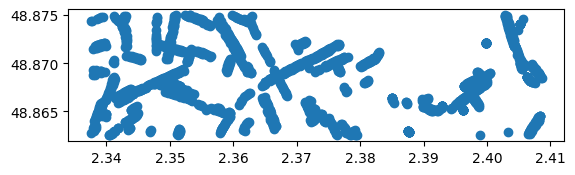

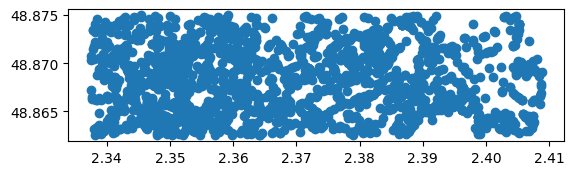

In [ ]:
from shapely.geometry import box

def filter_points_by_area(gdf, minx, miny, maxx, maxy):
    """
    Filtre les points à l'intérieur d'un rectangle délimité par les coordonnées minx, miny, maxx, maxy.

    :param gdf: GeoDataFrame avec les points
    :param minx: Longitude minimale du rectangle
    :param miny: Latitude minimale du rectangle
    :param maxx: Longitude maximale du rectangle
    :param maxy: Latitude maximale du rectangle
    :return: GeoDataFrame avec les points dans la zone spécifiée
    """
    # Créer un polygone représentant le rectangle
    area_of_interest = box(minx, miny, maxx, maxy)

    # Filtrer les points qui se trouvent à l'intérieur de ce rectangle
    filtered_gdf = gdf[gdf.geometry.within(area_of_interest)]

    return filtered_gdf

# Définir une zone d'intérêt (exemple : un rectangle autour de Paris)
minx, miny, maxx, maxy = 2.3375, 48.8625, 2.4125, 48.875  # Coordonnées approximatives de Paris
#MinX: 2.3375, MinY: 48.8625, MaxX: 2.4125, MaxY: 48.875

# Filtrer les points en 1898
filtered_1898 = filter_points_by_area(gdf_1898, minx, miny, maxx, maxy)
# Filtrer les points en 1951
filtered_1951 = filter_points_by_area(gdf_1951, minx, miny, maxx, maxy)

# Visualiser les données filtrées
filtered_1898.plot()
filtered_1951.plot()


In [ ]:
len(filtered_1898)

1845

In [ ]:
len(filtered_1951)

1842

In [ ]:
import folium
from folium import LayerControl

# Créer une carte centrée sur Paris
m = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

# Ajouter les points de 1898 avec des popups pour les noms des propriétaires
layer_1898 = folium.FeatureGroup(name='1898 Data').add_to(m)
for _, row in filtered_1898.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,  # Taille du cercle
        color='blue',  # Couleur du contour
        fill=True,
        fill_color='blue',  # Couleur de remplissage
        fill_opacity=0.6,
        popup=f"Propriétaire: {row['proprio_name*']}"
    ).add_to(layer_1898)

# Ajouter les points de 1951 avec des popups pour les noms des propriétaires
layer_1951 = folium.FeatureGroup(name='1951 Data').add_to(m)
for _, row in filtered_1951.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,  # Taille du cercle
        color='red',  # Couleur du contour
        fill=True,
        fill_color='red',  # Couleur de remplissage
        fill_opacity=0.6,
        popup=f"Propriétaire: {row['nom_pers']}"
    ).add_to(layer_1951)

# Ajouter un contrôle des couches pour activer/désactiver les couches
LayerControl().add_to(m)

# Afficher la carte
m.save("comparaison_map_1898_1951.html")


##Clustering spatial avec DBSCAN

In [ ]:
!pip install scikit-learn
!pip install geopandas
!pip install folium

In [ ]:
import geopandas as gpd
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np
import folium
import matplotlib.pyplot as plt

def apply_dbscan(gdf, eps=0.01, min_samples=5):
    """
    Applique DBSCAN sur un GeoDataFrame donné.

    :param gdf: GeoDataFrame avec des points géographiques.
    :param eps: Distance maximale entre deux points pour être considérés comme voisins (en degrés).
    :param min_samples: Nombre minimum de points pour constituer un cluster.
    :return: GeoDataFrame avec une colonne 'cluster' indiquant le numéro du cluster ou -1 pour le bruit.
    """
    # Extraire les coordonnées des points (longitudes et latitudes)
    coords = np.array(list(zip(gdf.geometry.x, gdf.geometry.y)))

    # Appliquer DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    gdf['cluster'] = dbscan.fit_predict(coords)
    print(gdf['cluster'])

    return gdf

def plot_dbscan_clusters(gdf, title):
    """
    Visualise les clusters DBSCAN sur une carte interactive.

    :param gdf: GeoDataFrame avec les clusters.
    :param title: Titre de la carte.
    :return: Carte Folium.
    """
    # Créer une carte centrée sur Paris
    m = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

    # Définir une palette de couleurs pour les clusters
    cluster_colors = plt.cm.get_cmap('tab20', len(gdf['cluster'].unique()))

    # Ajouter des cercles pour chaque point, avec des couleurs par cluster
    for _, row in gdf.iterrows():
        color = cluster_colors(row['cluster'] % len(gdf['cluster'].unique()))  # Assigner une couleur à chaque cluster
        folium.CircleMarker(
            location=[row.geometry.y, row.geometry.x],
            radius=5,
            color=f'#{int(color[0]*255):02x}{int(color[1]*255):02x}{int(color[2]*255):02x}',
            fill=True,
            fill_color=f'#{int(color[0]*255):02x}{int(color[1]*255):02x}{int(color[2]*255):02x}',
            fill_opacity=0.6,
            weight=0
        ).add_to(m)

    return m


In [ ]:
# Appliquer DBSCAN
gdf_1898_clusters = apply_dbscan(gdf_1898, eps=0.001, min_samples=5)

# Visualiser les clusters DBSCAN sur la carte
map_1898_dbscan = plot_dbscan_clusters(gdf_1898_clusters, "Clusters DBSCAN en 1898")
map_1898_dbscan.save("dbscan_clusters_1898.html")


0         0
1         0
2         0
3         0
4         0
         ..
14009    77
14010    77
14011    77
14012    77
14013    77
Name: cluster, Length: 13027, dtype: int64


<ipython-input-80-f7c8c47a2d35>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cluster_colors = plt.cm.get_cmap('tab20', len(gdf['cluster'].unique()))


In [ ]:
# Appliquer DBSCAN
gdf_1951_clusters = apply_dbscan(gdf_1951, eps=0.001, min_samples=5)

# Visualiser les clusters DBSCAN sur la carte
map_1951_dbscan = plot_dbscan_clusters(gdf_1951_clusters, "Clusters DBSCAN en 1951")
map_1951_dbscan.save("dbscan_clusters_1951.html")


79568     18
84895     -1
26688      0
40468      0
83379      0
        ... 
80188      3
31267    115
80580      3
73430     11
43733     13
Name: cluster, Length: 13880, dtype: int64


<ipython-input-80-f7c8c47a2d35>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cluster_colors = plt.cm.get_cmap('tab20', len(gdf['cluster'].unique()))


**Paramètre à ajuster**:

*eps* : la distance maximale entre deux points pour qu'ils soient considérés comme voisins. Cela correspond à la tolerance spatiale. Plus eps est petit, plus les points doivent être proches pour être considérés comme voisins. Un eps trop grand peut fusionner des clusters qui ne devraient pas l'être.

*min_samples* : le nombre minimum de points requis pour qu'un groupe soit considéré comme un cluster. Plus ce nombre est élevé, plus les clusters doivent être denses pour être formés.

In [ ]:
gdf_1951_clusters.to_file('gdf_1951_clusters.shp')
gdf_1898_clusters.to_file('gdf_1898_clusters.shp')

<ipython-input-83-fb6094304331>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_1951_clusters.to_file('gdf_1951_clusters.shp')
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Unnamed: 0.1' to 'Unnamed_ 0'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Unnamed: 0' to 'Unnamed__1'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: '__index_imm_geoGT__' to '__index_im'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: '__index_pers__' to '__index_pe'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'index_total' to 'index_tota'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/p